In [7]:
!pip install imbalanced-learn

     ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
     ---------------------------- --------- 174.1/235.6 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 2.4 MB/s eta 0:00:00


In [1]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from numpy import where
oversample = SMOTE()

### Import libraries

In [2]:
import glob
import librosa
import os
import sklearn.mixture
import sys
# import pysptk
import pyworld
import opensmile
import audiofile
#import audb

import time

import numpy as np
import pandas as pd

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

## Open Smile

In [4]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
#smile.feature_names
# setting up the feature extracter

In [5]:
smile.feature_names

['F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_

## Speaker wise performance

### Feature extraction

In [6]:
class DataPrep:
    def __init__(self, folderPath=None):




        self.folderPath = folderPath
        #         self.classFolder = os.listdir(self.folderPath)

        self.spk_folders_path = os.path.join(self.folderPath)
        self.spk_folders = os.listdir(self.spk_folders_path)
        self.files=[]

        #         print(self.classFolder)

        self.file_features = np.zeros((1,88))
#         self.labels = np.zeros(1)

        Y=[0]
        spk_label=['sp']
        for spks in range(len(self.spk_folders)):

#             print(self.spk_folders[spks])

            self.spk_files_path = os.path.join(self.folderPath, self.spk_folders[spks])
            self.spk_files = os.listdir(self.spk_files_path)

            #                 print(self.spk_files)

            for spk_file in range(len(self.spk_files)):
#                 if(os.path.isdir(os.path.join(self.folderPath,self.spk_folders[spks],self.spk_files[spk_file])) or os.path.islink(os.path.join(self.folderPath,self.spk_folders[spks],self.spk_files[spk_file])) ):
#                     print("Skiping: "+wav_path)
#                     continue
                if(os.path.isfile(os.path.join(self.folderPath,self.spk_folders[spks],self.spk_files[spk_file])) and not (os.path.join(self.folderPath,self.spk_folders[spks],self.spk_files[spk_file])).endswith('.lnk')):
                    wav_path = os.path.join(self.folderPath,self.spk_folders[spks],self.spk_files[spk_file])
                    print(wav_path)
    
                    self.files.append(self.spk_files[spk_file])
                    y = smile.process_file(wav_path)

                    ######################################################################

                    #                     print(mfcc)

                    file_feats = np.asarray(y)

                    self.file_features = np.concatenate((self.file_features, file_feats),axis=0)
                    label=self.spk_folders[spks]
    #                 print(label)
                    label=label[2]
                    print(label)
                    if label=='D':
                        l=0
                    else:
                        l=1

    #                 print(l)
                    Y.append(l)
                    if("NonDepression" in self.folderPath):
                        spk_label.append(self.spk_folders[spks][0]+'_'+self.folderPath[15]+'_'+self.spk_files[spk_file])
                    else:
                        spk_label.append(self.spk_folders[spks][0]+'_'+self.folderPath[14]+'_'+self.spk_files[spk_file])
                        print('Hi')
#                 self.labels = np.concatenate((self.labels,np.ones((len(file_feats),1))*y),axis=0)
                #                 self.labels = np.concatenate((self.labels,np.ones((len(file_feats),1))*cls), axis=0)
#                 print(spk_label)
#                 print(self.folderPath,self.spk_folders[spks],self.spk_files[spk_file])

        self.file_features = self.file_features[1:,:]

        self.labels=np.asarray(Y)
        self.labels=self.labels.T
        self.labels=self.labels[1:]

        self.speaker_labels=np.asarray(Y)
        self.speaker_labels=self.speaker_labels.T
        self.speaker_labels=self.speaker_labels[1:]

In [7]:
def accuracy(y_test, prob_score, s_test):
    spk_list=list(set(s_test))
#     print(spk_list)
    avg_score=np.zeros((len(spk_list),2))

    for i in range(len(spk_list)):
        count=0
        for j in range(len(s_test)):
            if (spk_list[i] == s_test[j]):
                avg_score[i,0]=avg_score[i,0]+prob_score[j,0]
                avg_score[i,1]=avg_score[i,1]+prob_score[j,1]
                count=count+1
        avg_score[i]=avg_score[i]/(count)

    y_final=[10]
    for i in range(len(spk_list)):
        if (avg_score[i,0]>=avg_score[i,1]):
            y_final.append(0)
        else:
            y_final.append(1)
    y_final=y_final[1:]
    y_test=[10]
    for i in range(len(spk_list)):
        label=spk_list[i][2]
        if label=='D':
            y_test.append(0)
        else:
            y_test.append(1)
    y_test=y_test[1:]

    print("Speaker level accuracy: ",accuracy_score(y_test, y_final))
    print(sklearn.metrics.confusion_matrix(y_test, y_final))


## Loading data into csv

In [8]:
Train_dataD = DataPrep(r"syll_sec_duration\Train\Depression")
Train_dataN = DataPrep(r"syll_sec_duration\Train\NonDepression")

Test_dataD = DataPrep(r"syll_sec_duration\Test\Depression")
Test_dataN = DataPrep(r"syll_sec_duration\Test\NonDepression")


syll_sec_duration\Train\Depression\F_D_320\320_102.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_105.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_106.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_123.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_131.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_135.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_141.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_151.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_158.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_168.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_184.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_190.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_201.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_208.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_244.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_320\320_246.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_3

D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_67.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_75.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_79.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_80.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_81.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_84.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_87.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_89.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_93.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_94.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_338\338_97.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_345\345_103.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_345\345_104.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_345\345_113.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_345\345_114.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_345\345_119.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_345\345

D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_205.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_206.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_207.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_22.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_24.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_26.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_30.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_31.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_34.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_37.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_41.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_45.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_51.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_58.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_63.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_64.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_350\350_6

D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_101.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_104.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_108.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_109.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_115.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_117.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_122.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_125.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_126.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_130.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_140.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_143.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_156.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_157.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_158.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_353\353_159.wav
D
Hi
syll_sec_duration\Train\Depression\

D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_268.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_269.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_270.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_272.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_277.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_280.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_281.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_283.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_287.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_290.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_291.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_293.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_294.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_297.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_301.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_372\372_306.wav
D
Hi
syll_sec_duration\Train\Depression\

D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_242.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_244.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_245.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_247.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_248.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_250.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_253.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_258.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_259.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_26.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_263.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_264.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_265.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_28.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_33.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_376\376_34.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_

D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_75.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_76.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_83.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_84.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_87.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_90.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_94.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_95.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_96.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_97.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_386\386_98.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_402\402_100.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_402\402_101.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_402\402_102.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_402\402_103.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_402\402_104.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_402\402

D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_191.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_192.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_195.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_201.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_202.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_203.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_204.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_206.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_213.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_214.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_215.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_217.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_219.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_22.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_223.wav
D
Hi
syll_sec_duration\Train\Depression\F_D_414\414_224.wav
D
Hi
syll_sec_duration\Train\Depression\F

D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_173.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_174.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_177.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_178.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_181.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_20.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_23.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_28.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_30.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_33.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_40.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_44.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_49.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_51.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_52.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319_59.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_319\319

D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_220.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_226.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_23.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_235.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_236.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_237.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_244.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_248.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_25.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_251.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_252.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_254.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_26.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_261.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_262.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_344\344_267.wav
D
Hi
syll_sec_duration\Train\Depression\M_D

D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_130.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_131.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_132.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_139.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_146.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_147.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_15.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_152.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_155.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_157.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_158.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_159.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_162.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_167.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_168.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_356\356_169.wav
D
Hi
syll_sec_duration\Train\Depression\M

D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_236.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_237.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_239.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_246.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_247.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_248.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_249.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_25.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_250.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_252.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_253.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_257.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_258.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_262.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_264.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_380\380_266.wav
D
Hi
syll_sec_duration\Train\Depression\M

D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_184.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_190.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_193.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_195.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_201.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_207.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_208.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_209.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_210.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_211.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_218.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_219.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_23.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_26.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_30.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_412\412_32.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_

D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_205.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_21.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_212.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_213.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_214.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_216.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_22.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_225.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_230.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_25.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_26.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_33.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_36.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_39.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_42.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\433_46.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_433\4

D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_290.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_292.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_293.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_294.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_295.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_31.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_32.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_35.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_36.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_41.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_42.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_47.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_53.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_54.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_55.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448_56.wav
D
Hi
syll_sec_duration\Train\Depression\M_D_448\448

N
syll_sec_duration\Train\NonDepression\F_N_303\303_155.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_164.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_167.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_169.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_171.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_173.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_179.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_18.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_180.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_182.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_189.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_21.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_23.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_28.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_38.wav
N
syll_sec_duration\Train\NonDepression\F_N_303\303_41.wav
N
syll_sec_duration\Train\NonDepression\F_N_30

N
syll_sec_duration\Train\NonDepression\F_N_341\341_68.wav
N
syll_sec_duration\Train\NonDepression\F_N_341\341_73.wav
N
syll_sec_duration\Train\NonDepression\F_N_341\341_76.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_100.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_16.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_20.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_22.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_24.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_26.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_30.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_34.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_36.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_38.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_39.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_41.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_42.wav
N
syll_sec_duration\Train\NonDepression\F_N_360\360_44.

N
syll_sec_duration\Train\NonDepression\F_N_369\369_69.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_7.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_70.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_71.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_76.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_77.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_79.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_80.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_83.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_86.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_87.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_89.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_91.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_92.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_93.wav
N
syll_sec_duration\Train\NonDepression\F_N_369\369_99.wav
N
syll_sec_duration\Train\NonDepression\F_N_374\374_100.w

N
syll_sec_duration\Train\NonDepression\F_N_391\391_43.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_44.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_45.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_46.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_49.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_50.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_53.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_61.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_66.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_74.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_79.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_8.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_81.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_83.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_91.wav
N
syll_sec_duration\Train\NonDepression\F_N_391\391_94.wav
N
syll_sec_duration\Train\NonDepression\F_N_392\392_11.wa

N
syll_sec_duration\Train\NonDepression\F_N_415\415_152.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_153.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_154.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_16.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_163.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_170.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_171.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_172.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_175.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_178.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_182.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_19.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_190.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_196.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_197.wav
N
syll_sec_duration\Train\NonDepression\F_N_415\415_198.wav
N
syll_sec_duration\Train\NonDepression\F_

N
syll_sec_duration\Train\NonDepression\F_N_419\419_92.wav
N
syll_sec_duration\Train\NonDepression\F_N_419\419_94.wav
N
syll_sec_duration\Train\NonDepression\F_N_419\419_95.wav
N
syll_sec_duration\Train\NonDepression\F_N_419\419_96.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_100.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_101.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_102.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_105.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_108.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_111.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_114.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_116.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_118.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_119.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_121.wav
N
syll_sec_duration\Train\NonDepression\F_N_423\423_123.wav
N
syll_sec_duration\Train\NonDepression\F_N_

N
syll_sec_duration\Train\NonDepression\F_N_425\425_248.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_25.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_253.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_27.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_28.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_31.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_33.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_36.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_39.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_43.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_45.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_46.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_47.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_48.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_49.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_50.wav
N
syll_sec_duration\Train\NonDepression\F_N_425\425_54

N
syll_sec_duration\Train\NonDepression\F_N_444\444_174.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_177.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_179.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_181.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_182.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_183.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_184.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_185.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_188.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_189.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_19.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_190.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_192.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_193.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_196.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_198.wav
N
syll_sec_duration\Train\NonDepression\F

N
syll_sec_duration\Train\NonDepression\F_N_444\444_56.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_57.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_59.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_60.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_62.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_65.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_67.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_70.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_71.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_78.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_83.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_84.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_87.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_88.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_89.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_90.wav
N
syll_sec_duration\Train\NonDepression\F_N_444\444_91.w

N
syll_sec_duration\Train\NonDepression\F_N_449\449_102.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_103.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_104.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_105.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_106.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_107.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_11.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_110.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_111.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_112.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_113.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_114.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_116.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_117.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_118.wav
N
syll_sec_duration\Train\NonDepression\F_N_449\449_119.wav
N
syll_sec_duration\Train\NonDepression\F

N
syll_sec_duration\Train\NonDepression\F_N_454\454_189.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_19.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_195.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_200.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_201.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_208.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_211.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_214.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_26.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_39.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_61.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_64.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_67.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_72.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_78.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\454_79.wav
N
syll_sec_duration\Train\NonDepression\F_N_454\4

N
syll_sec_duration\Train\NonDepression\F_N_456\456_187.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_19.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_191.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_193.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_194.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_195.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_197.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_200.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_203.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_21.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_22.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_23.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_26.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_27.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_28.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\456_29.wav
N
syll_sec_duration\Train\NonDepression\F_N_456\

N
syll_sec_duration\Train\NonDepression\F_N_486\486_150.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_151.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_152.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_158.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_161.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_166.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_175.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_179.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_18.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_187.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_188.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_194.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_22.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_34.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_37.wav
N
syll_sec_duration\Train\NonDepression\F_N_486\486_38.wav
N
syll_sec_duration\Train\NonDepression\F_N_4

N
syll_sec_duration\Train\NonDepression\F_N_487\487_58.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_60.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_65.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_66.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_67.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_69.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_73.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_74.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_75.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_79.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_81.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_84.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_88.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_92.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_93.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_95.wav
N
syll_sec_duration\Train\NonDepression\F_N_487\487_98.w

N
syll_sec_duration\Train\NonDepression\F_N_491\491_57.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_60.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_62.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_65.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_66.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_67.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_68.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_76.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_8.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_81.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_83.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_85.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_87.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_97.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_98.wav
N
syll_sec_duration\Train\NonDepression\F_N_491\491_99.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_107.w

N
syll_sec_duration\Train\NonDepression\M_N_305\305_46.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_49.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_54.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_58.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_66.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_67.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_74.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_76.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_78.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_79.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_81.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_83.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_84.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_91.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_92.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_96.wav
N
syll_sec_duration\Train\NonDepression\M_N_305\305_97.w

N
syll_sec_duration\Train\NonDepression\M_N_313\313_78.wav
N
syll_sec_duration\Train\NonDepression\M_N_313\313_86.wav
N
syll_sec_duration\Train\NonDepression\M_N_313\313_91.wav
N
syll_sec_duration\Train\NonDepression\M_N_313\313_95.wav
N
syll_sec_duration\Train\NonDepression\M_N_313\313_97.wav
N
syll_sec_duration\Train\NonDepression\M_N_313\313_99.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_103.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_106.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_111.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_122.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_128.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_137.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_138.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_141.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_145.wav
N
syll_sec_duration\Train\NonDepression\M_N_315\315_149.wav
N
syll_sec_duration\Train\NonDepression\M_N_31

N
syll_sec_duration\Train\NonDepression\M_N_318\318_57.wav
N
syll_sec_duration\Train\NonDepression\M_N_318\318_61.wav
N
syll_sec_duration\Train\NonDepression\M_N_318\318_75.wav
N
syll_sec_duration\Train\NonDepression\M_N_318\318_94.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_101.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_103.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_105.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_106.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_109.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_114.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_117.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_119.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_127.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_129.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_132.wav
N
syll_sec_duration\Train\NonDepression\M_N_322\322_142.wav
N
syll_sec_duration\Train\NonDepression\M_N_

N
syll_sec_duration\Train\NonDepression\M_N_324\324_248.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_249.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_44.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_48.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_49.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_56.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_57.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_60.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_62.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_68.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_70.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_76.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_78.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_84.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_85.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_86.wav
N
syll_sec_duration\Train\NonDepression\M_N_324\324_90

N
syll_sec_duration\Train\NonDepression\M_N_333\333_144.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_145.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_146.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_148.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_150.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_154.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_158.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_161.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_165.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_173.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_175.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_181.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_182.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_186.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_187.wav
N
syll_sec_duration\Train\NonDepression\M_N_333\333_191.wav
N
syll_sec_duration\Train\NonDepression\

N
syll_sec_duration\Train\NonDepression\M_N_343\343_188.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_19.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_190.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_212.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_215.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_223.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_225.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_230.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_231.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_32.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_39.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_40.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_41.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_42.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_49.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\343_53.wav
N
syll_sec_duration\Train\NonDepression\M_N_343\

N
syll_sec_duration\Train\NonDepression\M_N_363\363_214.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_215.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_217.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_220.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_221.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_26.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_27.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_28.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_30.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_31.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_34.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_35.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_37.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_43.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_44.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363_45.wav
N
syll_sec_duration\Train\NonDepression\M_N_363\363

N
syll_sec_duration\Train\NonDepression\M_N_364\364_257.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_259.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_264.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_265.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_266.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_269.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_270.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_271.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_273.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_275.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_276.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_279.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_280.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_281.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_283.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_289.wav
N
syll_sec_duration\Train\NonDepression\

N
syll_sec_duration\Train\NonDepression\M_N_364\364_81.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_82.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_83.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_84.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_85.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_86.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_87.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_88.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_90.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_92.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_97.wav
N
syll_sec_duration\Train\NonDepression\M_N_364\364_98.wav
N
syll_sec_duration\Train\NonDepression\M_N_366\366_102.wav
N
syll_sec_duration\Train\NonDepression\M_N_366\366_103.wav
N
syll_sec_duration\Train\NonDepression\M_N_366\366_111.wav
N
syll_sec_duration\Train\NonDepression\M_N_366\366_112.wav
N
syll_sec_duration\Train\NonDepression\M_N_366\366_

N
syll_sec_duration\Train\NonDepression\M_N_366\366_94.wav
N
syll_sec_duration\Train\NonDepression\M_N_366\366_95.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_101.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_103.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_108.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_109.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_117.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_118.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_119.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_12.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_120.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_122.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_125.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_127.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_130.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_131.wav
N
syll_sec_duration\Train\NonDepression\M_N

N
syll_sec_duration\Train\NonDepression\M_N_368\368_42.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_43.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_45.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_46.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_48.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_50.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_51.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_57.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_58.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_59.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_60.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_61.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_67.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_68.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_73.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_76.wav
N
syll_sec_duration\Train\NonDepression\M_N_368\368_77.w

N
syll_sec_duration\Train\NonDepression\M_N_370\370_77.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_78.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_79.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_83.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_84.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_85.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_86.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_87.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_91.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_92.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_94.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_95.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_96.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_97.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_98.wav
N
syll_sec_duration\Train\NonDepression\M_N_370\370_99.wav
N
syll_sec_duration\Train\NonDepression\M_N_371\371_101.

N
syll_sec_duration\Train\NonDepression\M_N_379\379_150.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_151.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_154.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_155.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_156.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_157.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_158.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_16.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_162.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_166.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_167.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_169.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_17.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_171.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_177.wav
N
syll_sec_duration\Train\NonDepression\M_N_379\379_178.wav
N
syll_sec_duration\Train\NonDepression\M_

N
syll_sec_duration\Train\NonDepression\M_N_383\383_164.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_165.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_166.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_167.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_17.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_172.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_173.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_178.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_181.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_183.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_184.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_185.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_190.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_195.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_201.wav
N
syll_sec_duration\Train\NonDepression\M_N_383\383_202.wav
N
syll_sec_duration\Train\NonDepression\M

N
syll_sec_duration\Train\NonDepression\M_N_393\393_85.wav
N
syll_sec_duration\Train\NonDepression\M_N_393\393_88.wav
N
syll_sec_duration\Train\NonDepression\M_N_393\393_9.wav
N
syll_sec_duration\Train\NonDepression\M_N_393\393_91.wav
N
syll_sec_duration\Train\NonDepression\M_N_393\393_92.wav
N
syll_sec_duration\Train\NonDepression\M_N_393\393_95.wav
N
syll_sec_duration\Train\NonDepression\M_N_393\393_97.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_102.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_104.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_106.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_109.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_11.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_110.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_112.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_118.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\397_119.wav
N
syll_sec_duration\Train\NonDepression\M_N_397\3

N
syll_sec_duration\Train\NonDepression\M_N_400\400_189.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_19.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_195.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_197.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_206.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_210.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_211.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_212.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_216.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_221.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_223.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_227.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_24.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_28.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_30.wav
N
syll_sec_duration\Train\NonDepression\M_N_400\400_31.wav
N
syll_sec_duration\Train\NonDepression\M_N_4

N
syll_sec_duration\Train\NonDepression\M_N_409\409_291.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_293.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_294.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_295.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_297.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_300.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_301.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_302.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_309.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_31.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_315.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_317.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_318.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_34.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_35.wav
N
syll_sec_duration\Train\NonDepression\M_N_409\409_36.wav
N
syll_sec_duration\Train\NonDepression\M_N_

N
syll_sec_duration\Train\NonDepression\M_N_428\428_164.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_165.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_167.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_17.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_170.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_174.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_175.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_176.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_178.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_184.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_190.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_191.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_192.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_194.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_196.wav
N
syll_sec_duration\Train\NonDepression\M_N_428\428_200.wav
N
syll_sec_duration\Train\NonDepression\M

N
syll_sec_duration\Train\NonDepression\M_N_430\430_187.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_189.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_19.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_190.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_191.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_201.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_203.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_209.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_210.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_212.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_213.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_216.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_217.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_220.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_223.wav
N
syll_sec_duration\Train\NonDepression\M_N_430\430_229.wav
N
syll_sec_duration\Train\NonDepression\M

N
syll_sec_duration\Train\NonDepression\M_N_434\434_34.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_36.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_39.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_40.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_47.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_48.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_51.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_54.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_56.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_58.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_62.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_64.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_66.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_68.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_73.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_75.wav
N
syll_sec_duration\Train\NonDepression\M_N_434\434_76.w

N
syll_sec_duration\Train\NonDepression\M_N_445\445_141.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_142.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_143.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_150.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_155.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_157.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_160.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_166.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_167.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_169.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_170.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_172.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_24.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_26.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_27.wav
N
syll_sec_duration\Train\NonDepression\M_N_445\445_33.wav
N
syll_sec_duration\Train\NonDepression\M_N_

N
syll_sec_duration\Train\NonDepression\M_N_457\457_17.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_170.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_172.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_179.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_186.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_189.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_191.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_194.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_20.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_201.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_202.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_205.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_209.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_213.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_214.wav
N
syll_sec_duration\Train\NonDepression\M_N_457\457_215.wav
N
syll_sec_duration\Train\NonDepression\M_

N
syll_sec_duration\Train\NonDepression\M_N_464\464_157.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_159.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_167.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_174.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_182.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_183.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_184.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_185.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_187.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_188.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_189.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_191.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_198.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_200.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_201.wav
N
syll_sec_duration\Train\NonDepression\M_N_464\464_202.wav
N
syll_sec_duration\Train\NonDepression\

N
syll_sec_duration\Train\NonDepression\M_N_468\468_184.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_186.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_188.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_189.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_191.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_199.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_204.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_208.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_209.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_21.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_210.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_212.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_219.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_224.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_225.wav
N
syll_sec_duration\Train\NonDepression\M_N_468\468_227.wav
N
syll_sec_duration\Train\NonDepression\M

N
syll_sec_duration\Train\NonDepression\M_N_471\471_75.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_78.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_79.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_80.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_82.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_83.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_84.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_88.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_90.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_91.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_96.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_98.wav
N
syll_sec_duration\Train\NonDepression\M_N_471\471_99.wav
N
syll_sec_duration\Train\NonDepression\M_N_474\474_10.wav
N
syll_sec_duration\Train\NonDepression\M_N_474\474_100.wav
N
syll_sec_duration\Train\NonDepression\M_N_474\474_101.wav
N
syll_sec_duration\Train\NonDepression\M_N_474\474_11

N
syll_sec_duration\Train\NonDepression\M_N_475\475_24.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_26.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_30.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_34.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_35.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_36.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_46.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_52.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_53.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_57.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_58.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_60.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_63.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_67.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_68.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_75.wav
N
syll_sec_duration\Train\NonDepression\M_N_475\475_78.w

D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_176.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_177.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_179.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_185.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_186.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_187.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_189.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_190.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_191.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_193.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_194.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_195.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_205.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_206.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_207.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_209.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_308\308_21.wa

D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_160.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_161.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_162.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_164.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_165.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_167.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_168.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_17.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_171.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_172.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_173.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_174.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_177.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_178.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_179.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_180.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_181.wa

D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_410.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_411.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_413.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_414.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_416.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_418.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_419.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_420.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_422.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_423.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_425.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_426.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_427.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_428.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_43.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_430.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_337\337_431.wa

D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_331.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_332.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_333.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_34.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_343.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_344.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_350.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_358.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_359.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_362.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_367.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_370.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_376.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_384.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_386.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_389.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_405\405_392.wa

D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_72.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_74.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_75.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_76.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_77.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_78.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_79.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_84.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_86.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_88.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_89.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_90.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_91.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_92.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_97.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_410\410_98.wav
D
Hi
syll_sec_duration\Test\Depression\F_D_421\421_106.wav
D
Hi
syll_sec

D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_150.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_155.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_159.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_160.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_165.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_166.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_167.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_168.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_173.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_174.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_175.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_178.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_179.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_181.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_183.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_188.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_359\359_189.w

D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_277.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_278.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_280.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_281.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_287.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_289.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_29.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_290.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_292.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_294.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_296.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_298.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_299.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_30.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_307.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_310.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_365\365_313.wav

D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_41.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_45.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_56.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_66.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_74.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_77.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_80.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_81.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_83.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_87.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_95.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_96.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_384\384_98.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_453\453_100.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_453\453_106.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_453\453_107.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_453\453_108.wav
D
Hi
syll_

D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_73.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_77.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_82.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_85.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_86.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_88.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_89.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_92.wav
D
Hi
syll_sec_duration\Test\Depression\M_D_461\461_95.wav
D
Hi
syll_sec_duration\Test\NonDepression\F_N_306\306_101.wav
N
syll_sec_duration\Test\NonDepression\F_N_306\306_104.wav
N
syll_sec_duration\Test\NonDepression\F_N_306\306_105.wav
N
syll_sec_duration\Test\NonDepression\F_N_306\306_106.wav
N
syll_sec_duration\Test\NonDepression\F_N_306\306_107.wav
N
syll_sec_duration\Test\NonDepression\F_N_306\306_108.wav
N
syll_sec_duration\Test\NonDepression\F_N_306\306_112.wav
N
syll_sec_duration\Test\NonDepression\F_N_306\306_114.wav
N
s

N
syll_sec_duration\Test\NonDepression\F_N_314\314_288.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_292.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_301.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_303.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_304.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_306.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_31.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_311.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_312.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_316.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_318.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_319.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_320.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_321.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_322.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_323.wav
N
syll_sec_duration\Test\NonDepression\F_N_314\314_324.wa

N
syll_sec_duration\Test\NonDepression\F_N_323\323_50.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_55.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_62.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_66.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_71.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_75.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_84.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_85.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_86.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_91.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_92.wav
N
syll_sec_duration\Test\NonDepression\F_N_323\323_96.wav
N
syll_sec_duration\Test\NonDepression\F_N_378\378_102.wav
N
syll_sec_duration\Test\NonDepression\F_N_378\378_103.wav
N
syll_sec_duration\Test\NonDepression\F_N_378\378_105.wav
N
syll_sec_duration\Test\NonDepression\F_N_378\378_110.wav
N
syll_sec_duration\Test\NonDepression\F_N_378\378_111.wav
N
syll_se

N
syll_sec_duration\Test\NonDepression\F_N_399\399_64.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_68.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_69.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_70.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_71.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_72.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_73.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_76.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_77.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_78.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_79.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_80.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_83.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_86.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_87.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_9.wav
N
syll_sec_duration\Test\NonDepression\F_N_399\399_90.wav
N
syll_sec_dura

N
syll_sec_duration\Test\NonDepression\F_N_411\411_209.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_210.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_211.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_213.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_214.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_216.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_217.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_218.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_220.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_221.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_222.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_224.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_227.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_228.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_229.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_23.wav
N
syll_sec_duration\Test\NonDepression\F_N_411\411_230.wa

N
syll_sec_duration\Test\NonDepression\F_N_424\424_151.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_152.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_154.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_161.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_162.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_166.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_167.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_168.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_171.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_172.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_173.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_177.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_179.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_18.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_180.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_182.wav
N
syll_sec_duration\Test\NonDepression\F_N_424\424_183.wa

N
syll_sec_duration\Test\NonDepression\F_N_431\431_86.wav
N
syll_sec_duration\Test\NonDepression\F_N_431\431_89.wav
N
syll_sec_duration\Test\NonDepression\F_N_431\431_95.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_109.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_116.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_117.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_118.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_119.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_12.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_120.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_122.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_128.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_133.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_135.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_136.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_138.wav
N
syll_sec_duration\Test\NonDepression\F_N_435\435_141.wav
N

N
syll_sec_duration\Test\NonDepression\F_N_438\438_206.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_207.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_208.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_211.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_212.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_213.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_218.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_219.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_22.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_220.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_221.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_223.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_224.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_225.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_226.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_227.wav
N
syll_sec_duration\Test\NonDepression\F_N_438\438_228.wa

N
syll_sec_duration\Test\NonDepression\F_N_450\450_190.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_192.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_194.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_198.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_199.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_200.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_203.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_205.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_206.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_207.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_215.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_216.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_218.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_22.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_223.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_224.wav
N
syll_sec_duration\Test\NonDepression\F_N_450\450_225.wa

N
syll_sec_duration\Test\NonDepression\F_N_462\462_153.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_154.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_162.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_165.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_168.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_170.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_172.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_173.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_175.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_177.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_191.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_193.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_194.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_195.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_196.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_20.wav
N
syll_sec_duration\Test\NonDepression\F_N_462\462_200.wa

N
syll_sec_duration\Test\NonDepression\F_N_466\466_271.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_272.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_274.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_277.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_280.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_288.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_290.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_297.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_298.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_300.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_302.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_307.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_308.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_309.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_314.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_317.wav
N
syll_sec_duration\Test\NonDepression\F_N_466\466_318.w

N
syll_sec_duration\Test\NonDepression\F_N_469\469_251.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_254.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_255.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_256.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_257.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_26.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_27.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_32.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_33.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_36.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_38.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_49.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_52.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_55.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_57.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_58.wav
N
syll_sec_duration\Test\NonDepression\F_N_469\469_59.wav
N
syll_se

N
syll_sec_duration\Test\NonDepression\M_N_301\301_139.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_14.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_140.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_142.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_143.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_148.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_149.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_150.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_153.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_159.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_161.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_162.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_163.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_164.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_165.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_168.wav
N
syll_sec_duration\Test\NonDepression\M_N_301\301_169.wa

N
syll_sec_duration\Test\NonDepression\M_N_349\349_140.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_141.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_142.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_143.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_144.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_145.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_146.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_151.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_153.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_157.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_158.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_159.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_17.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_170.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_175.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_176.wav
N
syll_sec_duration\Test\NonDepression\M_N_349\349_181.wa

N
syll_sec_duration\Test\NonDepression\M_N_373\373_118.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_119.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_126.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_127.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_129.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_130.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_132.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_133.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_136.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_137.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_139.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_142.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_143.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_144.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_145.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_146.wav
N
syll_sec_duration\Test\NonDepression\M_N_373\373_147.w

N
syll_sec_duration\Test\NonDepression\M_N_387\387_142.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_144.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_149.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_26.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_29.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_34.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_36.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_39.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_41.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_46.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_47.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_56.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_59.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_67.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_69.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_72.wav
N
syll_sec_duration\Test\NonDepression\M_N_387\387_73.wav
N
syll_sec_

N
syll_sec_duration\Test\NonDepression\M_N_407\407_200.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_201.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_203.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_204.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_205.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_206.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_207.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_208.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_21.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_211.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_212.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_213.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_214.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_215.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_216.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_22.wav
N
syll_sec_duration\Test\NonDepression\M_N_407\407_225.wav

N
syll_sec_duration\Test\NonDepression\M_N_432\432_144.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_146.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_147.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_152.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_154.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_157.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_158.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_163.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_164.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_165.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_169.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_170.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_171.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_172.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_181.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_182.wav
N
syll_sec_duration\Test\NonDepression\M_N_432\432_191.w

N
syll_sec_duration\Test\NonDepression\M_N_442\442_63.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_66.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_67.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_70.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_72.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_77.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_78.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_79.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_81.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_84.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_85.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_86.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_89.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_93.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_94.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_95.wav
N
syll_sec_duration\Test\NonDepression\M_N_442\442_96.wav
N
syll_sec_dur

N
syll_sec_duration\Test\NonDepression\M_N_465\465_362.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_364.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_365.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_366.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_368.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_371.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_372.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_373.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_388.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_390.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_393.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_41.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_42.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_43.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_44.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_45.wav
N
syll_sec_duration\Test\NonDepression\M_N_465\465_47.wav
N
s

N
syll_sec_duration\Test\NonDepression\M_N_480\480_17.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_171.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_175.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_178.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_179.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_18.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_184.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_186.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_188.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_189.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_190.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_30.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_33.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_34.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_35.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_36.wav
N
syll_sec_duration\Test\NonDepression\M_N_480\480_37.wav
N
syl

N
syll_sec_duration\Test\NonDepression\M_N_481\481_66.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_67.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_70.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_82.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_83.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_84.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_91.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_92.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_93.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_94.wav
N
syll_sec_duration\Test\NonDepression\M_N_481\481_95.wav
N


# Loading Data from Csv

In [9]:
type(Test_dataD)

__main__.DataPrep

In [17]:
X_trainD=Train_dataD.file_features
# Y_trainD=Train_dataD.labels
S_trainD=Train_dataD.speaker_labels

X_trainN=Train_dataN.file_features
# Y_trainN=Train_dataN.labels
S_trainN=Train_dataN.speaker_labels

X_testD=Test_dataD.file_features
# Y_testD=Test_dataD.labels
S_testD=Test_dataD.speaker_labels

X_testN=Test_dataN.file_features
# Y_testN=Test_dataN.labels
S_testN=Test_dataN.speaker_labels
S_trainD

array([0, 0, 0, ..., 0, 0, 0])

In [11]:

X_train_full=np.concatenate((X_trainD, X_trainN),axis=0)
# y_train_full=np.concatenate((Y_trainD, Y_trainN),axis=0)
s_train_full=np.concatenate((S_trainD, S_trainN),axis=0)


X_test_full=np.concatenate((X_testD, X_testN),axis=0)
# y_test_full=np.concatenate((Y_testD, Y_testN),axis=0)
s_test_full=np.concatenate((S_testD, S_testN),axis=0)
np.shape(X_test_full)
# np.shape(y_test_full)
np.shape(s_test_full)
s_train_full


array([0, 0, 0, ..., 1, 1, 1])

In [12]:
t1=np.array(Train_dataD.files)
t2=np.array(Train_dataN.files)
Train_file=np.concatenate((t1,t2))
te1=np.array(Test_dataD.files)
te2=np.array(Test_dataN.files)
Test_file=np.concatenate((te1,te2))
Train_file.shape

(7764,)

In [13]:
train_arr=np.concatenate((Train_file.reshape(-1, 1),X_train_full,s_train_full.reshape(-1, 1)),axis=1)
test_arr=np.concatenate((Test_file.reshape(-1, 1),X_test_full,s_test_full.reshape(-1, 1)),axis=1)
train_arr[0]

array(['320_102.wav', '35.16300582885742', '0.123795285820961',
       '33.58937072753906', '35.9030647277832', '38.09276580810547',
       '4.503395080566406', '138.19448852539062', '237.82235717773438',
       '27.745954513549805', '49.6385612487793', '0.4862304925918579',
       '0.8791266679763794', '0.16890686750411987', '0.3362823724746704',
       '0.7695045471191406', '0.6005976796150208', '7.045331954956055',
       '3.6911025047302246', '6.75137996673584', '3.649425983428955',
       '0.21877141296863556', '1.062023401260376', '22.476133346557617',
       '0.5867303013801575', '6.739439487457275', '2.269824981689453',
       '-4.061984062194824', '-3.497992753982544', '-15.547411918640137',
       '-1.3130600452423096', '0.017625195905566216', '1.08649742603302',
       '0.8341302871704102', '0.8340035676956177', '9.71461296081543',
       '0.2859901785850525', '10.306075096130371', '0.7635166645050049',
       '29.46771812438965', '0.3326936364173889', '580.3544921875',
    

In [14]:
train_pd=pd.DataFrame(train_arr,columns=['File_name','F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_sma3_amean',
 'mfcc4_sma3_stddevNorm',
 'jitterLocal_sma3nz_amean',
 'jitterLocal_sma3nz_stddevNorm',
 'shimmerLocaldB_sma3nz_amean',
 'shimmerLocaldB_sma3nz_stddevNorm',
 'HNRdBACF_sma3nz_amean',
 'HNRdBACF_sma3nz_stddevNorm',
 'logRelF0-H1-H2_sma3nz_amean',
 'logRelF0-H1-H2_sma3nz_stddevNorm',
 'logRelF0-H1-A3_sma3nz_amean',
 'logRelF0-H1-A3_sma3nz_stddevNorm',
 'F1frequency_sma3nz_amean',
 'F1frequency_sma3nz_stddevNorm',
 'F1bandwidth_sma3nz_amean',
 'F1bandwidth_sma3nz_stddevNorm',
 'F1amplitudeLogRelF0_sma3nz_amean',
 'F1amplitudeLogRelF0_sma3nz_stddevNorm',
 'F2frequency_sma3nz_amean',
 'F2frequency_sma3nz_stddevNorm',
 'F2bandwidth_sma3nz_amean',
 'F2bandwidth_sma3nz_stddevNorm',
 'F2amplitudeLogRelF0_sma3nz_amean',
 'F2amplitudeLogRelF0_sma3nz_stddevNorm',
 'F3frequency_sma3nz_amean',
 'F3frequency_sma3nz_stddevNorm',
 'F3bandwidth_sma3nz_amean',
 'F3bandwidth_sma3nz_stddevNorm',
 'F3amplitudeLogRelF0_sma3nz_amean',
 'F3amplitudeLogRelF0_sma3nz_stddevNorm',
 'alphaRatioV_sma3nz_amean',
 'alphaRatioV_sma3nz_stddevNorm',
 'hammarbergIndexV_sma3nz_amean',
 'hammarbergIndexV_sma3nz_stddevNorm',
 'slopeV0-500_sma3nz_amean',
 'slopeV0-500_sma3nz_stddevNorm',
 'slopeV500-1500_sma3nz_amean',
 'slopeV500-1500_sma3nz_stddevNorm',
 'spectralFluxV_sma3nz_amean',
 'spectralFluxV_sma3nz_stddevNorm',
 'mfcc1V_sma3nz_amean',
 'mfcc1V_sma3nz_stddevNorm',
 'mfcc2V_sma3nz_amean',
 'mfcc2V_sma3nz_stddevNorm',
 'mfcc3V_sma3nz_amean',
 'mfcc3V_sma3nz_stddevNorm',
 'mfcc4V_sma3nz_amean',
 'mfcc4V_sma3nz_stddevNorm',
 'alphaRatioUV_sma3nz_amean',
 'hammarbergIndexUV_sma3nz_amean',
 'slopeUV0-500_sma3nz_amean',
 'slopeUV500-1500_sma3nz_amean',
 'spectralFluxUV_sma3nz_amean',
 'loudnessPeaksPerSec',
 'VoicedSegmentsPerSec',
 'MeanVoicedSegmentLengthSec',
 'StddevVoicedSegmentLengthSec',
 'MeanUnvoicedSegmentLength',
 'StddevUnvoicedSegmentLength',
 'equivalentSoundLevel_dBp','Label'])

In [15]:
test_pd=pd.DataFrame(test_arr,columns=['File_name','F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_sma3_amean',
 'mfcc4_sma3_stddevNorm',
 'jitterLocal_sma3nz_amean',
 'jitterLocal_sma3nz_stddevNorm',
 'shimmerLocaldB_sma3nz_amean',
 'shimmerLocaldB_sma3nz_stddevNorm',
 'HNRdBACF_sma3nz_amean',
 'HNRdBACF_sma3nz_stddevNorm',
 'logRelF0-H1-H2_sma3nz_amean',
 'logRelF0-H1-H2_sma3nz_stddevNorm',
 'logRelF0-H1-A3_sma3nz_amean',
 'logRelF0-H1-A3_sma3nz_stddevNorm',
 'F1frequency_sma3nz_amean',
 'F1frequency_sma3nz_stddevNorm',
 'F1bandwidth_sma3nz_amean',
 'F1bandwidth_sma3nz_stddevNorm',
 'F1amplitudeLogRelF0_sma3nz_amean',
 'F1amplitudeLogRelF0_sma3nz_stddevNorm',
 'F2frequency_sma3nz_amean',
 'F2frequency_sma3nz_stddevNorm',
 'F2bandwidth_sma3nz_amean',
 'F2bandwidth_sma3nz_stddevNorm',
 'F2amplitudeLogRelF0_sma3nz_amean',
 'F2amplitudeLogRelF0_sma3nz_stddevNorm',
 'F3frequency_sma3nz_amean',
 'F3frequency_sma3nz_stddevNorm',
 'F3bandwidth_sma3nz_amean',
 'F3bandwidth_sma3nz_stddevNorm',
 'F3amplitudeLogRelF0_sma3nz_amean',
 'F3amplitudeLogRelF0_sma3nz_stddevNorm',
 'alphaRatioV_sma3nz_amean',
 'alphaRatioV_sma3nz_stddevNorm',
 'hammarbergIndexV_sma3nz_amean',
 'hammarbergIndexV_sma3nz_stddevNorm',
 'slopeV0-500_sma3nz_amean',
 'slopeV0-500_sma3nz_stddevNorm',
 'slopeV500-1500_sma3nz_amean',
 'slopeV500-1500_sma3nz_stddevNorm',
 'spectralFluxV_sma3nz_amean',
 'spectralFluxV_sma3nz_stddevNorm',
 'mfcc1V_sma3nz_amean',
 'mfcc1V_sma3nz_stddevNorm',
 'mfcc2V_sma3nz_amean',
 'mfcc2V_sma3nz_stddevNorm',
 'mfcc3V_sma3nz_amean',
 'mfcc3V_sma3nz_stddevNorm',
 'mfcc4V_sma3nz_amean',
 'mfcc4V_sma3nz_stddevNorm',
 'alphaRatioUV_sma3nz_amean',
 'hammarbergIndexUV_sma3nz_amean',
 'slopeUV0-500_sma3nz_amean',
 'slopeUV500-1500_sma3nz_amean',
 'spectralFluxUV_sma3nz_amean',
 'loudnessPeaksPerSec',
 'VoicedSegmentsPerSec',
 'MeanVoicedSegmentLengthSec',
 'StddevVoicedSegmentLengthSec',
 'MeanUnvoicedSegmentLength',
 'StddevUnvoicedSegmentLength',
 'equivalentSoundLevel_dBp','Label'])

In [16]:
train_pd.to_csv('syll_sec_train.csv',index=False)
test_pd.to_csv('syll_sec_test.csv',index=False)

## Do not run everytime

In [115]:
X_train_full_df=pd.DataFrame(X_train_full)
s_train_full_df=pd.DataFrame(s_train_full)
X_test_full_df=pd.DataFrame(X_test_full)
s_test_full_df=pd.DataFrame(s_test_full)

In [116]:
# X_train_full_df.to_csv("Daic_X_train.csv")
# s_train_full_df.to_csv("Daic_y_train.csv")
# X_test_full_df.to_csv("Daic_X_test.csv")
# s_test_full_df.to_csv("Daic_y_test.csv")

## Till here

In [8]:
X_train_full_df=pd.read_csv("Daic_X_train.csv").drop(['Unnamed: 0'],axis=1)
s_train_full_df=pd.read_csv("Daic_y_train.csv").drop(['Unnamed: 0'],axis=1)
X_test_full_df=pd.read_csv("Daic_X_test.csv").drop(['Unnamed: 0'],axis=1)
s_test_full_df=pd.read_csv("Daic_y_test.csv").drop(['Unnamed: 0'],axis=1)

In [25]:
len(X_test_full_df)

4135

In [11]:
X_train_full = X_train_full_df[:].values
s_train_full = s_train_full_df[:].values
X_test_full = X_test_full_df[:].values
s_test_full = s_test_full_df[:].values

In [12]:
# len(X_test_full)
s_train_full = np.array([x[0] for x in s_train_full])
s_test_full = np.array([x[0] for x in s_test_full])

In [13]:
s_test_full

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [14]:
X_train_full, X_test, s_train_full, s_test = train_test_split(X_train_full, s_train_full, test_size=0.001, shuffle=True, random_state=0)

In [15]:
X_train1_full=X_train_full[~np.isnan(X_train_full).any(axis=1)]
nan_index_full=np.argwhere(np.isnan(X_train_full)) ## identify the nan rows for removing those from labels

# removal_rows_full=np.unique(nan_index_full[:,0])
# y_train1_full=np.delete(y_train_full,removal_rows_full,axis=0)

removal_rows_full=np.unique(nan_index_full[:,0])
s_train1_full=np.delete(s_train_full,removal_rows_full,axis=0)

X_train=X_train1_full
# y_train=y_train1_full
s_train=s_train1_full
# s_train=[lol[:3] for lol in s_train]
##################################################################
X_test1_full=X_test_full[~np.isnan(X_test_full).any(axis=1)]
nan_index_full=np.argwhere(np.isnan(X_test_full))

# removal_rows_full=np.unique(nan_index_full[:,0])
# y_test1_full=np.delete(y_test_full,removal_rows_full,axis=0)

removal_rows_full=np.unique(nan_index_full[:,0])
s_test1_full=np.delete(s_test_full,removal_rows_full,axis=0)

X_test=X_test1_full
# y_test=y_test1_full
s_test=s_test1_full
# s_test=[lol[:3] for lol in s_test]

In [16]:
s_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [17]:
train_spk_list=list(set(s_train))
print(train_spk_list)
test_spk_list=list(set(s_test))
print(test_spk_list)


y_train=[10]
for i in range(len(s_train)):
    label=s_train[i]
    if label==0:
        y_train.append(0)
    else:
        y_train.append(1)
y_train=y_train[1:]

y_test=[10]
for i in range(len(s_test)):
    label=s_test[i]
    if label==0:
        y_test.append(0)
    else:
        y_test.append(1)
y_test=y_test[1:]
print(len(y_train))

[0, 1]
[0, 1]
7756


In [18]:
# x_train2=[]
# x_test2=[]
# y_train=[10]
# print(len(X_train))
# print(len(x_train2))
# for i in range(len(s_train)):
#     label=s_train[i][2]
#     if s_train[i][0] =='D':
#         pass
# #         print(s_train[i])
#     elif label=='D':
#         x_train2.append(X_train[i])
# #         print(len(x_train2))
#         y_train.append(s_train[i])
#     elif label=='N':
#         x_train2.append(X_train[i])
#         y_train.append(s_train[i])
# y_train=y_train[1:]

# y_test=[10]
# for i in range(len(s_test)):
#     label=s_test[i][2]
#     if s_test[i][0]=='D':
#         pass
# #         print(s_test[i])
#     elif label=='D':
#         x_test2.append(X_test[i])
#         y_test.append(s_test[i])
#     elif label == 'N':
#         x_test2.append(X_test[i])
#         y_test.append(s_test[i])
# y_test=y_test[1:]
# print(len(y_train))
# print(len(x_train2))
# train_spk_list=list(set(y_train))
# print(train_spk_list)
# test_spk_list=list(set(y_test))
# print(test_spk_list)

In [19]:
np.shape(y_train)
# y_train
label

1

In [19]:
# X_train=x_train2
# X_test=x_test2
# X_train=np.array(X_train)
# X_train.shape

(7756, 88)

In [20]:
etc=ExtraTreesClassifier(n_estimators=150)
etc=etc.fit(X_train, y_train)

In [21]:
th=-np.sort(-etc.feature_importances_)[87]
th

0.008050056985904951

In [22]:
res = [idx for idx, val in enumerate(etc.feature_importances_) if val > th]
res=np.asarray(res)
res.T

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87])

In [23]:
X_train.shape

(7756, 88)

In [24]:
X_train_new=X_train
X_test_new=X_test

In [22]:
# X_train_new=(X_train[:,res])
# X_test_new=X_test[:,res]
# print(np.shape(X_test_new))
# print(np.shape(X_train_new))
# for i in range(len(X_train_new)):
#     if(len(X_train_new[i])==88):
#         pass
#     else:
#         print(len(X_train_new[i]))
print(X_train_new[i])

[ 3.39755859e+01  1.50039449e-01  3.00662422e+01  3.40623894e+01
  3.90736923e+01  9.00745010e+00  1.64910294e+02  2.69058319e+02
  4.09278755e+01  2.41222229e+01  3.25807929e-01  9.71687436e-01
  9.90855396e-02  2.20614702e-01  5.17901897e-01  4.18816358e-01
  7.08278894e+00  5.30354691e+00  5.23200750e+00  6.61068726e+00
  1.44065022e-01  1.12346566e+00  2.38897114e+01  4.84055758e-01
  6.65069818e+00  2.05696321e+00  1.90439463e+00  5.67951918e+00
 -9.40661049e+00 -1.92811537e+00  1.41048906e-02  9.76462781e-01
  1.03894413e+00  1.04399526e+00  9.64542294e+00  3.05624098e-01
  5.87768221e+00  1.23945463e+00  2.98714771e+01  2.70351946e-01
  6.13976501e+02  3.39193404e-01  1.42176184e+03  1.54968932e-01
 -1.25044189e+02 -7.29875982e-01  1.63679688e+03  1.30398482e-01
  1.14474316e+03  3.40009809e-01 -1.27556374e+02 -6.64081216e-01
  2.77096509e+03  7.62557685e-02  9.17266968e+02  2.75575995e-01
 -1.30984528e+02 -6.16207361e-01 -1.82643337e+01 -3.16798627e-01
  3.01943455e+01  2.67096

In [27]:
y_train1=np.array(y_train)
y_test1=np.array(y_test)
y_train1

array([0, 1, 1, ..., 0, 1, 1])

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled =scaler.fit_transform(X_train_new)
test_scaled = scaler.fit_transform(X_test_new)
X_train_new=train_scaled
X_test_new=test_scaled
X_train_new

array([[ 1.57018337,  0.3280526 ,  1.46898111, ..., -0.36179446,
        -0.71944353,  0.40482339],
       [-1.21037376,  0.25150479, -1.28180898, ..., -0.26869635,
         0.0417259 ,  0.69555477],
       [-1.25163092, -0.91049204, -1.08026836, ..., -0.41021739,
        -0.81651524,  1.22176014],
       ...,
       [ 0.25536235,  0.6334717 ,  0.15798877, ...,  0.73154542,
        -0.49889447,  0.89315791],
       [ 0.96006081, -1.3773884 ,  1.15657575, ..., -0.04613476,
        -0.13100417,  1.6945852 ],
       [ 1.2775937 , -0.38106488,  1.23235638, ..., -0.88498104,
        -0.92200289,  1.09302619]])

In [26]:
y_train_nog = np.zeros_like(y_train1)
for i in range(len(y_train1)):
    if y_train1[i] == 'F_D' or y_train1[i] == 'M_D':
        y_train_nog[i] = '0'
    else:
        y_train_nog[i] = '1'
y_train_nog

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
y_test_nog = np.zeros_like(y_test1)
for i in range(len(y_test1)):
    if y_test1[i] == 'F_D' or y_test1[i] == 'M_D':
        y_test_nog[i] = '0'
    else:
        y_test_nog[i] = '1'
y_test_nog

array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U3')

In [154]:
counts = Counter(y_train_nog)

# Get the count of 0's and 1's
count_of_zeros = counts['0']
count_of_ones = counts['1']

# Print the results
print(f"Number of 0's: {count_of_zeros}")
print(f"Number of 1's: {count_of_ones}")
type(y_train_nog[120])

Number of 0's: 2069
Number of 1's: 5687


numpy.str_

In [155]:
counts = Counter(y_test_nog)

# Get the count of 0's and 1's
count_of_zeros = counts['0']
count_of_ones = counts['1']

# Print the results
print(f"Number of 0's: {count_of_zeros}")
print(f"Number of 1's: {count_of_ones}")

Number of 0's: 1166
Number of 1's: 2969


In [389]:
X_train_new, y_train1 = oversample.fit_resample(X_train_new, y_train)

In [405]:
X_test_new, y_test1 = oversample.fit_resample(X_test_new, y_test)

In [406]:
y_train1=np.array(y_train1)
y_test1=np.array(y_test1)

In [156]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_nog)

# Step 2: Perform one-hot encoding using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

label_encoder1 = LabelEncoder()
y_test_encoded = label_encoder1.fit_transform(y_test_nog)

# Step 2: Perform one-hot encoding using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_test_onehot = onehot_encoder.fit_transform(y_test_encoded.reshape(-1, 1))

C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [161]:
y_train_encoded

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [159]:
n1=np.count_nonzero(y_test1== 0)
n2=np.count_nonzero(y_test1== 1)
n3=np.count_nonzero(y_test1== 2)
n4=np.count_nonzero(y_test1== 3)
if(n1==n2 and n2==n3 and n3==n4):
    print("Resampled")
else:
    print("n1:",n1," ,n2: ",n2)

Resampled


C:\Users\rishi\AppData\Local\Temp\ipykernel_26784\889357914.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  n1=np.count_nonzero(y_test1== 0)
C:\Users\rishi\AppData\Local\Temp\ipykernel_26784\889357914.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  n2=np.count_nonzero(y_test1== 1)
C:\Users\rishi\AppData\Local\Temp\ipykernel_26784\889357914.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  n3=np.count_nonzero(y_test1== 2)
C:\Users\rishi\AppData\Local\Temp\ipykernel_26784\889357914.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  n4=np.count_nonzero(y_test1== 3)


In [30]:
n1=np.count_nonzero(y_test1== 0)
n2=np.count_nonzero(y_test1== 1)
# n3=np.count_nonzero(y_train1== 2)
# n4=np.count_nonzero(y_train1== 3)
if(n1==n2):
    print("Resampled")
else:
    pass
print("n1:",n1," ,n2: ",n2)

n1: 1166  ,n2:  2969


In [113]:
type(y_train1)

numpy.ndarray

#### F_D is 0  
#### F_N is 1
#### M_D is 2
#### M_N is 3

## Visualizations 

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
class_column = 'labels'
# Create a t-SNE model with 2 components (you can change it to 3 if needed)
tsne = TSNE(n_components=2, random_state=0)
m_dep_samples = merged_df[merged_df[class_column] == 0].drop([class_column], axis=1)
f_dep_samples = merged_df[merged_df[class_column] == 1].drop([class_column], axis=1)
m_nondep_samples=merged_df[merged_df[class_column] == 1].drop([class_column], axis=1)
f_nondep_samples=merged_df[merged_df[class_column] == 1].drop([class_column], axis=1)
# Fit the t-SNE model to your feature vectors
# X_tsne = tsne.fit_transform(X_train_new)
# X_tsne.shape
dep_tsne=tsne.fit_transform(dep_samples)
nondep_tsne=tsne.fit_transform(nondep_samples)
scaler = MinMaxScaler()
dep_scaled=scaler.fit_transform(dep_tsne)
nondep_scaled=scaler.fit_transform(nondep_tsne)
# X_tsne_normalized = scaler.fit_transform(X_tsne)
# Plot the t-SNE results
sns.set(style='white')
plt.figure(figsize=(8, 8))  # Square figure
sns.scatterplot(x=dep_scaled[:, 1], y=dep_scaled[:, 0], label='Depressed', color='green', marker='o', s=100, alpha=1.0)  # Circular markers with equal size
sns.scatterplot(x=nondep_scaled[:, 1], y=nondep_scaled[:, 0], label='Non-Depressed', color='red', marker='*', s=200, alpha=1.0)  # Slightly larger star markers
# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne_normalized[:, 0], X_tsne_normalized[:, 1], c=y_train, cmap=plt.cm.Paired)
# plt.title("t-SNE Plot of Feature Vectors")
# plt.colorbar()
# plt.show()
plt.legend()
plt.tight_layout()
plt.show()


# Neural Networks

In [110]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'


In [178]:
import tensorflow as tf
from tensorflow.keras import Model,initializers
from tensorflow.keras.layers import Input, Dense
ncol=88
input_dim = Input(shape = (ncol, ))
model10 = tf.keras.Sequential([
    Input(shape = (ncol, )),
#     tf.keras.layers.Dense(88, activation='relu')(input_dim),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer=initializers.HeNormal())
])
model10.build()


In [179]:
model10.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                5696      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dropout_39 (Dropout)        (None, 16)                0         
                                                                 
 dense_49 (Dense)            (None, 1)               

In [180]:
model10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [209]:
batch_size=32
nb_epoch=100
model10.fit(X_train_new, y_train1,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1)

Epoch 1/100
243/243 [==============================] - 0s 904us/step - loss: 0.3915 - accuracy: 0.8383
Epoch 2/100
243/243 [==============================] - 0s 893us/step - loss: 0.3755 - accuracy: 0.8435
Epoch 3/100
243/243 [==============================] - 0s 917us/step - loss: 0.3778 - accuracy: 0.8441
Epoch 4/100
243/243 [==============================] - 0s 903us/step - loss: 0.3848 - accuracy: 0.8415
Epoch 5/100
243/243 [==============================] - 0s 913us/step - loss: 0.3749 - accuracy: 0.8414
Epoch 6/100
243/243 [==============================] - 0s 900us/step - loss: 0.3749 - accuracy: 0.8470
Epoch 7/100
243/243 [==============================] - 0s 905us/step - loss: 0.3861 - accuracy: 0.8355
Epoch 8/100
243/243 [==============================] - 0s 911us/step - loss: 0.3795 - accuracy: 0.8432
Epoch 9/100
243/243 [==============================] - 0s 909us/step - loss: 0.3765 - accuracy: 0.8430
Epoch 10/100
243/243 [==============================] - 0s 905us/step - l

Epoch 80/100
243/243 [==============================] - 0s 911us/step - loss: 0.3677 - accuracy: 0.8427
Epoch 81/100
243/243 [==============================] - 0s 973us/step - loss: 0.3585 - accuracy: 0.8481
Epoch 82/100
243/243 [==============================] - 0s 936us/step - loss: 0.3682 - accuracy: 0.8468
Epoch 83/100
243/243 [==============================] - 0s 977us/step - loss: 0.3608 - accuracy: 0.8463
Epoch 84/100
243/243 [==============================] - 0s 932us/step - loss: 0.3615 - accuracy: 0.8442
Epoch 85/100
243/243 [==============================] - 0s 907us/step - loss: 0.3691 - accuracy: 0.8446
Epoch 86/100
243/243 [==============================] - 0s 914us/step - loss: 0.3784 - accuracy: 0.8404
Epoch 87/100
243/243 [==============================] - 0s 910us/step - loss: 0.3669 - accuracy: 0.8490
Epoch 88/100
243/243 [==============================] - 0s 946us/step - loss: 0.3777 - accuracy: 0.8421
Epoch 89/100
243/243 [==============================] - 0s 917us

In [210]:
y_pred=model10.predict(X_test_new)

130/130 [==============================] - 0s 547us/step


In [211]:
predicted_classes = (y_pred > 0.5).astype("int32")
acc=0
wrong=0
for i in range(len(y_pred)):
    print("Predicted value: "+str(predicted_classes[i][0])+" Actual Value: "+str(y_test1[i]))
    if(predicted_classes[i][0]==y_test1[i]):
        acc+=1
    else:
        wrong+=1
print("Correct Preds: "+str(acc))
print("Wrong Preds: "+ str(wrong))

Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 A

In [184]:
import sklearn
print(sklearn.metrics.confusion_matrix(y_test1, predicted_classes.ravel()))
print(sklearn.metrics.classification_report(y_test1,predicted_classes.ravel(),target_names=["class0","class1"]))

[[ 429  737]
 [1053 1916]]
              precision    recall  f1-score   support

      class0       0.29      0.37      0.32      1166
      class1       0.72      0.65      0.68      2969

    accuracy                           0.57      4135
   macro avg       0.51      0.51      0.50      4135
weighted avg       0.60      0.57      0.58      4135



0.6169286577992745
[[ 356  810]
 [ 774 2195]]
              precision    recall  f1-score   support

      class0       0.32      0.31      0.31      1166
      class1       0.73      0.74      0.73      2969

    accuracy                           0.62      4135
   macro avg       0.52      0.52      0.52      4135
weighted avg       0.61      0.62      0.62      4135



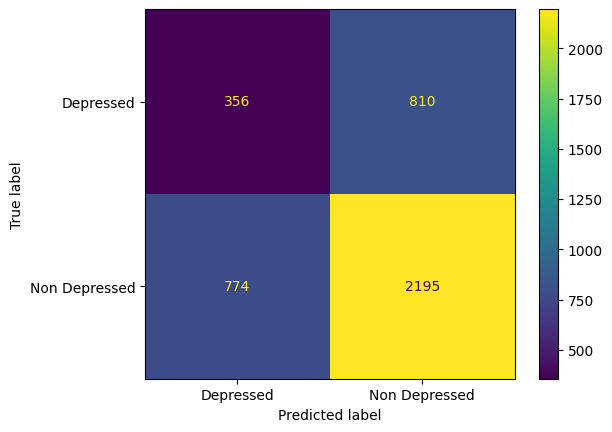

In [212]:
accuracy = accuracy_score(y_test1, predicted_classes)
print(accuracy)
import sklearn
import matplotlib.pyplot as plt
print(sklearn.metrics.confusion_matrix(y_test1, predicted_classes))
print(sklearn.metrics.classification_report(y_test1,predicted_classes,target_names=["class0","class1"]))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test1,predicted_classes)
# dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Depressed','Non Depressed'])
cm_display.plot()
plt.show()

# CNN

In [155]:
y_train_mapped=[]

7756


In [248]:
import tensorflow as tf
from tensorflow.keras import layers


model30 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(88, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the summary of the model
model30.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 86, 32)            128       
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 43, 32)           0         
 g1D)                                                            
                                                                 
 dropout_68 (Dropout)        (None, 43, 32)            0         
                                                                 
 conv1d_25 (Conv1D)          (None, 41, 64)            6208      
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 dropout_69 (Dropout)        (None, 20, 64)          

In [249]:
model30.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [250]:
batch_size3=16
nb_epoch3=50
model30.fit(X_train_new, y_train1,
          batch_size=batch_size3,
          epochs=nb_epoch3,
          verbose=1)

Epoch 1/50
711/711 [==============================] - 3s 3ms/step - loss: 0.6925 - accuracy: 0.5179
Epoch 2/50
711/711 [==============================] - 2s 3ms/step - loss: 0.6759 - accuracy: 0.5793
Epoch 3/50
711/711 [==============================] - 2s 3ms/step - loss: 0.6594 - accuracy: 0.6139
Epoch 4/50
711/711 [==============================] - 2s 3ms/step - loss: 0.6396 - accuracy: 0.6314
Epoch 5/50
711/711 [==============================] - 2s 3ms/step - loss: 0.6232 - accuracy: 0.6525
Epoch 6/50
711/711 [==============================] - 2s 3ms/step - loss: 0.6116 - accuracy: 0.6700
Epoch 7/50
711/711 [==============================] - 3s 4ms/step - loss: 0.6019 - accuracy: 0.6797
Epoch 8/50
711/711 [==============================] - 2s 3ms/step - loss: 0.5902 - accuracy: 0.6863
Epoch 9/50
711/711 [==============================] - 2s 3ms/step - loss: 0.5816 - accuracy: 0.6938
Epoch 10/50
711/711 [==============================] - 3s 4ms/step - loss: 0.5699 - accuracy: 0.7103

In [334]:
X_test_new.shape

(5938, 88)

In [254]:
y_pred=model30.predict(X_test_new)
y_pred

186/186 [==============================] - 0s 1ms/step


array([[0.8754071 ],
       [0.76666045],
       [0.88085246],
       ...,
       [0.9303974 ],
       [0.00947404],
       [0.5931622 ]], dtype=float32)

In [255]:
predicted_classes = (y_pred > 0.5).astype("int32")
acc=0
wrong=0
for i in range(len(y_pred)):
    print("Predicted value: "+str(predicted_classes[i][0])+" Actual Value: "+str(y_test1[i]))
    if(predicted_classes[i][0]==y_test1[i]):
        acc+=1
    else:
        wrong+=1
print("Correct Preds: "+str(acc))
print("Wrong Preds: "+ str(wrong))

Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 0 Actual Value: 0
Predicted value: 0 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 A

0.502526103065005
[[ 940 2029]
 [ 925 2044]]
              precision    recall  f1-score   support

      class0       0.50      0.32      0.39      2969
      class1       0.50      0.69      0.58      2969

    accuracy                           0.50      5938
   macro avg       0.50      0.50      0.48      5938
weighted avg       0.50      0.50      0.48      5938



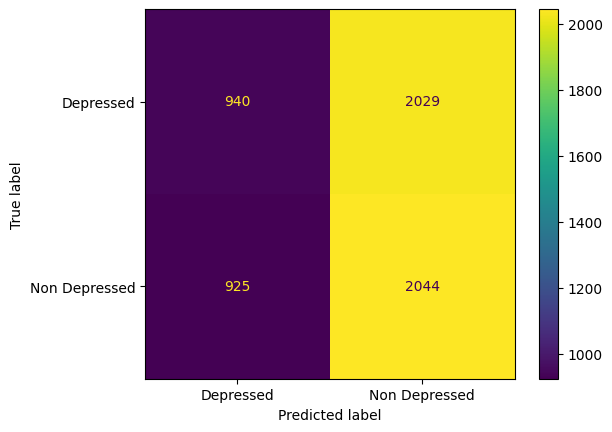

In [256]:
accuracy = accuracy_score(y_test1, predicted_classes)
print(accuracy)
import sklearn
import matplotlib.pyplot as plt
print(sklearn.metrics.confusion_matrix(y_test1, predicted_classes))
print(sklearn.metrics.classification_report(y_test1,predicted_classes,target_names=["class0","class1"]))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test1,predicted_classes)
# dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Depressed','Non Depressed'])
cm_display.plot()
plt.show()

# 2D CNN

In [407]:
# no resample
# X_train_reshaped=np.reshape(X_train_new,(7756,11,8))
# train_resample
X_train_reshaped=np.reshape(X_train_new,(11374,11,8))

In [408]:
#no resample
# X_test_reshaped=np.reshape(X_test_new,(4135,11,8))
# test resample
X_test_reshaped=np.reshape(X_test_new,(5938,11,8))

In [415]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (11, 8, 1)

model40 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model40.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 11, 8, 32)         320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 4, 32)         0         
 g2D)                                                            
                                                                 
 dropout_144 (Dropout)       (None, 5, 4, 32)          0         
                                                                 
 conv2d_55 (Conv2D)          (None, 5, 4, 64)          18496     
                                                                 
 dropout_145 (Dropout)       (None, 5, 4, 64)          0         
                                                                 
 conv2d_56 (Conv2D)          (None, 5, 4, 128)         73856     
                                                     

In [416]:
model40.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [417]:
batch_size3=16
nb_epoch3=75
model40.fit(X_train_reshaped, y_train1,
          batch_size=batch_size3,
          epochs=nb_epoch3,
          verbose=1)

Epoch 1/75
711/711 [==============================] - 3s 4ms/step - loss: 0.6855 - accuracy: 0.5499
Epoch 2/75
711/711 [==============================] - 3s 4ms/step - loss: 0.6305 - accuracy: 0.6547
Epoch 3/75
711/711 [==============================] - 3s 4ms/step - loss: 0.5900 - accuracy: 0.6899
Epoch 4/75
711/711 [==============================] - 3s 4ms/step - loss: 0.5697 - accuracy: 0.7093
Epoch 5/75
711/711 [==============================] - 3s 4ms/step - loss: 0.5425 - accuracy: 0.7325
Epoch 6/75
711/711 [==============================] - 3s 4ms/step - loss: 0.5277 - accuracy: 0.7444
Epoch 7/75
711/711 [==============================] - 3s 4ms/step - loss: 0.5019 - accuracy: 0.7593
Epoch 8/75
711/711 [==============================] - 3s 4ms/step - loss: 0.4931 - accuracy: 0.7660
Epoch 9/75
711/711 [==============================] - 3s 4ms/step - loss: 0.4856 - accuracy: 0.7680
Epoch 10/75
711/711 [==============================] - 3s 4ms/step - loss: 0.4673 - accuracy: 0.7814

In [418]:
y_pred=model40.predict(X_test_reshaped)
y_pred

186/186 [==============================] - 0s 2ms/step


array([[0.733694  ],
       [0.80050606],
       [0.89304304],
       ...,
       [0.73012036],
       [0.67300105],
       [0.8903327 ]], dtype=float32)

In [419]:
predicted_classes = (y_pred > 0.5).astype("int32")
acc=0
wrong=0
for i in range(len(y_pred)):
    print("Predicted value: "+str(predicted_classes[i][0])+" Actual Value: "+str(y_test1[i]))
    if(predicted_classes[i][0]==y_test1[i]):
        acc+=1
    else:
        wrong+=1
print("Correct Preds: "+str(acc))
print("Wrong Preds: "+ str(wrong))

Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 0 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 0 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 0 Actual Value: 0
Predicted value: 0 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 0 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 Actual Value: 0
Predicted value: 1 A

0.49882115190299764
[[ 778 2191]
 [ 785 2184]]
              precision    recall  f1-score   support

      class0       0.50      0.26      0.34      2969
      class1       0.50      0.74      0.59      2969

    accuracy                           0.50      5938
   macro avg       0.50      0.50      0.47      5938
weighted avg       0.50      0.50      0.47      5938



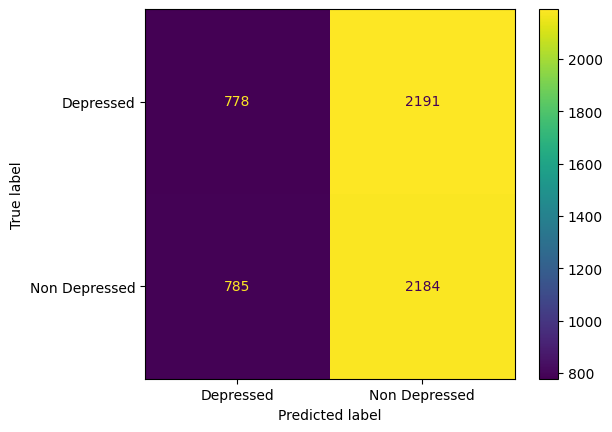

In [420]:
accuracy = accuracy_score(y_test1, predicted_classes)
print(accuracy)
import sklearn
import matplotlib.pyplot as plt
print(sklearn.metrics.confusion_matrix(y_test1, predicted_classes))
print(sklearn.metrics.classification_report(y_test1,predicted_classes,target_names=["class0","class1"]))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test1,predicted_classes)
# dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Depressed','Non Depressed'])
cm_display.plot()
plt.show()

# LSTM

In [119]:
num_steps=28
num_cols=88
X_train_lstm = X_train_new.reshape(277, num_steps,num_cols)
# X_train_lstm[0].shape
y_train_lstm = y_train_onehot.reshape(277, num_steps, 4)
y_train_lstm.shape

(277, 28, 4)

In [122]:
y_lstm_reshaped = y_train_lstm.reshape(y_train_lstm.shape[0], -1)
y_lstm_reshaped.shape

(277, 112)

In [127]:
tf.config.run_functions_eagerly(True)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

ncol = 88
n_units = 100

model2 = Sequential()
model2.add(LSTM(n_units, input_shape=(None, ncol), return_sequences=True))
model2.add(Dropout(0.5))
model2.add(LSTM(n_units, return_sequences=True))
model2.add(LSTM(n_units))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(112, activation='softmax'))
model2.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, None, 100)         75600     
                                                                 
 dropout_11 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_15 (LSTM)              (None, None, 100)         80400     
                                                                 
 lstm_16 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 112)              

In [129]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

model2.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=[CategoricalAccuracy()])

In [130]:
batch_size2=32
nb_epoch2=100
model2.fit(X_train_lstm, y_lstm_reshaped,
          batch_size=batch_size2,
          epochs=nb_epoch2,
          verbose=1)

Epoch 1/100


C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 2s 205ms/step - loss: 132.1539 - categorical_accuracy: 0.0144
Epoch 2/100
9/9 [==============================] - 2s 201ms/step - loss: 132.1389 - categorical_accuracy: 0.0144
Epoch 3/100
9/9 [==============================] - 2s 200ms/step - loss: 132.1227 - categorical_accuracy: 0.0072
Epoch 4/100
9/9 [==============================] - 2s 200ms/step - loss: 132.1037 - categorical_accuracy: 0.0036
Epoch 5/100
9/9 [==============================] - 2s 200ms/step - loss: 132.1139 - categorical_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 2s 201ms/step - loss: 132.3227 - categorical_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 2s 202ms/step - loss: 133.2488 - categorical_accuracy: 0.0000e+00
Epoch 8/100
9/9 [==============================] - 2s 200ms/step - loss: 136.6198 - categorical_accuracy: 0.0000e+00
Epoch 9/100
9/9 [==============================] - 2s 200ms/step - loss: 142.1126 - categori

# PCA Dimensionality Reduction

In [47]:
from sklearn.decomposition import PCA
import seaborn as sns

In [44]:
X_train_new2=pd.DataFrame(X_train_new)
X_train_new2

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,1.570183,0.328053,1.468981,1.501394,1.700629,0.982953,0.097918,-0.446748,1.619405,1.479357,...,1.117970,-1.067584,-0.021477,0.374090,0.882945,-0.714586,-0.555905,-0.361794,-0.719444,0.404823
1,-1.210374,0.251505,-1.281809,-1.190180,-1.071953,0.258242,-0.611029,-0.606377,-0.290525,-0.300199,...,-0.901590,-0.243688,1.120409,1.079132,0.137770,-0.086590,-0.217057,-0.268696,0.041726,0.695555
2,-1.251631,-0.910492,-1.080268,-1.239606,-1.342972,-0.973007,-0.305744,-0.143517,-0.408253,-0.285789,...,-0.931258,1.773830,1.107548,2.003788,0.241519,0.514298,-0.000198,-0.410217,-0.816515,1.221760
3,-1.726239,-0.279351,-1.648690,-1.683983,-1.662672,-0.436851,-0.691748,-0.774669,-0.005505,-0.006409,...,-0.290377,0.704175,0.702230,-0.957913,-1.468877,-0.538205,-0.668490,1.363593,1.455135,0.366774
4,0.789884,-0.535981,0.928516,0.737214,0.514169,-0.897641,-0.481176,-0.734114,-0.231762,-0.243421,...,-1.612035,1.520514,-0.451754,-0.814402,-2.192256,-0.244719,0.011747,2.909050,4.551888,-1.518212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,-0.394356,0.021869,-0.377428,-0.443301,-0.461532,-0.319148,0.087400,-0.036010,-0.217314,-0.238909,...,-0.247738,0.134672,-0.703458,-0.254398,0.167690,-0.513294,-0.634984,0.037548,0.485227,-1.101296
7752,0.278608,-1.172723,0.459513,0.315815,0.067393,-0.950935,-0.670416,-0.640381,-0.389873,-0.269567,...,0.265701,-2.176068,0.925439,-0.030877,0.147122,0.919106,0.966928,-0.746630,-0.858800,1.733416
7753,0.255362,0.633472,0.157989,0.273160,0.367989,0.607059,0.863938,-0.408340,-0.466375,-0.174071,...,-0.559826,-0.048502,0.513011,1.607165,-1.380657,-0.025448,0.105225,0.731545,-0.498894,0.893158
7754,0.960061,-1.377388,1.156576,0.974389,0.714971,-0.916283,-0.344576,-0.126282,-0.309139,-0.294587,...,-1.553603,1.386716,0.708817,-0.926990,-0.611478,0.658872,0.579995,-0.046135,-0.131004,1.694585


In [45]:
X_test_new2=pd.DataFrame(X_test_new)
X_test_new2

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.936423,-0.905205,1.101234,0.928538,0.652691,-1.011502,0.850010,-0.847791,-0.163712,-0.418960,...,1.351328,-2.904826,2.719328,0.427282,-0.979444,-1.119520,-1.209184,0.525967,0.936093,1.122738
1,0.768977,-1.103952,0.920279,0.683180,0.607480,-0.656732,0.003542,-0.120674,-0.177946,-0.339694,...,0.365465,-3.306341,3.914088,0.286677,-0.569090,-1.281925,-1.244376,0.314581,0.216382,1.976818
2,0.723041,-1.567660,0.979198,0.744344,0.448374,-1.300568,-0.807537,-0.755169,-0.284905,-0.421166,...,0.720356,-3.209692,2.497282,-0.025502,-1.690539,-1.165922,-1.084143,1.487588,3.007301,0.825186
3,0.918695,-0.358328,0.975216,0.864616,0.609818,-0.799048,-0.889399,-0.841770,-0.031009,-0.441221,...,0.756752,-2.124212,0.206447,-2.670372,-0.714783,-0.253365,0.407949,0.171140,0.386281,0.039935
4,0.656260,-1.289836,0.806228,0.730208,0.436588,-0.865926,-0.935191,-0.834158,-0.255860,-0.372759,...,0.352386,-2.701859,2.665399,-1.505095,-1.984275,0.179713,-0.622783,2.157608,3.457639,1.207034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,0.117250,0.918397,0.044958,-0.028276,0.168397,0.389538,-0.235797,-0.306455,-0.088359,-0.055659,...,2.975285,0.016550,0.313302,-1.776995,-0.432810,0.489055,-0.019649,0.023924,0.539003,0.202971
4131,-0.470106,-0.845939,-0.345466,-0.476950,-0.587459,-0.845868,-0.043536,0.426611,-0.143407,-0.260141,...,0.222398,0.116410,1.065149,-0.069586,-0.284934,-0.469904,-0.889786,0.147547,0.815848,0.282039
4132,-0.320702,-0.384284,-0.262290,-0.339820,-0.320516,-0.260759,-0.670927,-0.721107,-0.104890,-0.206957,...,0.828767,1.098252,-0.843299,-0.343898,0.358289,-0.247178,0.247349,-0.242511,-0.206161,-1.135134
4133,-0.330144,-0.831056,-0.247105,-0.326410,-0.392636,-0.521261,-0.530972,-0.707187,-0.262103,-0.174249,...,-0.770364,0.805542,0.855626,0.659669,2.270810,-1.119520,-1.034279,-0.413948,-0.675629,0.136002


<Axes: >

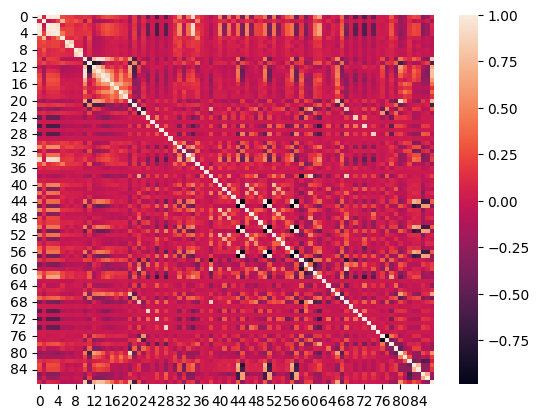

In [48]:
sns.heatmap(X_train_new2.corr())

In [84]:
pca = PCA(n_components = 30)
pca.fit(X_train_new2)
data_pca = pca.transform(X_train_new2)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-3.837642,1.326157,3.839424,5.704101,-1.328496,0.067965,0.032029,0.817575,-0.028207,0.236341,...,0.104407,0.203451,-0.080548,-0.049371,-0.107541,0.228623,-0.769743,-0.126693,0.843991,-0.587902
1,3.446070,-3.144489,0.710092,-1.338517,-0.383655,-2.816470,0.125550,0.599858,0.444096,0.923897,...,0.003489,-0.083086,-0.092425,0.069275,-0.008221,-0.127825,0.124079,0.677720,-0.306202,0.244319
2,3.182959,-4.110190,-0.445642,-5.789594,-2.647878,-1.761623,1.139357,-0.610235,1.264406,3.544660,...,4.553494,0.210434,0.183728,-2.475219,-4.066534,1.115411,-4.689374,5.915285,-5.584521,1.146343
3,6.598339,-1.532166,-2.145520,-0.013517,1.068293,0.802634,2.782686,-0.118761,1.384769,0.529889,...,0.049003,-0.107537,-0.374591,0.021308,-0.442314,0.416876,0.236888,2.558491,0.117220,0.102670
4,4.327954,7.361552,-1.466398,0.636182,4.489686,1.156645,1.524525,-3.677843,1.961385,1.453212,...,0.207513,-0.174322,0.252928,0.439705,0.301586,-0.210616,0.788522,-1.377534,-2.323686,0.081241


In [85]:
pca1 = PCA(n_components = 30)
pca1.fit(X_test_new2)
test_pca = pca1.transform(X_test_new2)
test_pca = pd.DataFrame(test_pca)
test_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,5.769199,-0.138094,-7.214587,5.420933,-1.100761,1.649491,2.960677,0.102812,0.893423,0.084556,...,-0.084601,0.343037,0.060453,0.464876,0.058437,-0.290294,-0.838509,0.102432,1.329647,0.813705
1,5.967074,0.245098,-9.788110,4.695651,-0.022086,3.381623,2.583600,1.373889,2.013810,1.137059,...,-0.160861,0.094939,-0.216507,0.234364,0.167814,-0.052454,-0.874648,0.270848,3.014102,-1.399480
2,6.855160,-3.000413,-7.167129,3.475028,-1.564476,4.063477,3.153355,-0.214210,2.128991,1.075734,...,-0.178537,0.155758,0.375753,0.709932,-0.072960,-1.766974,-1.642891,0.268604,2.381426,-0.300329
3,2.416879,-2.954119,-2.652699,1.808989,-4.618657,4.349309,1.426541,0.245754,2.132795,1.816014,...,-0.201943,0.078172,-0.292626,0.853855,0.310934,0.097480,-0.191113,0.703822,0.635669,-0.192008
4,6.169954,-1.670385,-7.268332,2.904005,-2.793300,4.414063,2.444295,-0.306924,3.139128,1.092861,...,-0.142500,-0.316962,0.936103,-0.164450,1.839683,-0.758897,-0.994301,0.384492,1.225729,-0.057758


<Axes: >

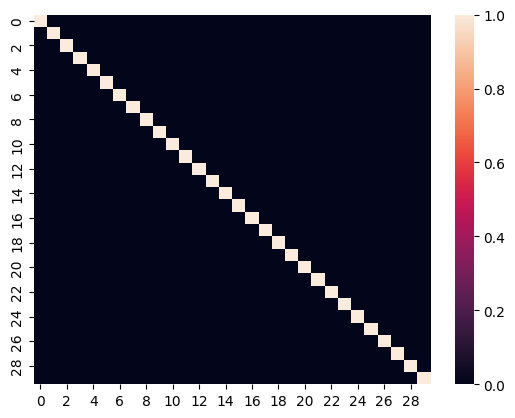

In [86]:
sns.heatmap(data_pca.corr())

In [87]:
def balanceaccuracy(matrix):
    acc=(matrix[0][0]/(matrix[0][0]+matrix[0][1]))+(matrix[1][1]/(matrix[1][0]+matrix[1][1]))
#     print(acc)
    acc=acc/2
    return acc

# Decision Tree Without K-fold Cross Validation

In [88]:
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.3s
Utterance level accuracy:  0.6169286577992745
0.7273666092943202
              precision    recall  f1-score   support

      class0       0.34      0.38      0.36      1166
      class1       0.74      0.71      0.73      2969

    accuracy                           0.62      4135
   macro avg       0.54      0.54      0.54      4135
weighted avg       0.63      0.62      0.62      4135

Balanced Accuracy: 0.5436653307736259


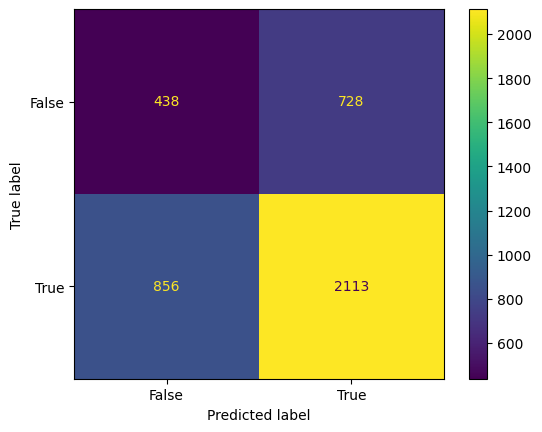

In [89]:
pipe2 = Pipeline([ ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipe
pipe2.fit(data_pca, y_train)

prob_score2=pipe2.predict_proba(test_pca)

print("Utterance level accuracy: ",accuracy_score(y_test, pipe2.predict(test_pca)))
# accuracy(y_test, prob_score2, s_test)
print(sklearn.metrics.f1_score(y_test, pipe2.predict(test_pca)))
print(classification_report(y_test, pipe2.predict(test_pca),target_names=["class0","class1"]))
confusion_matrix = metrics.confusion_matrix(y_test, pipe2.predict(test_pca))
dt_score=pipe2.predict_proba(test_pca)
# print("dt_score is ",confusion_matrix[0][1])
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Random forest (No Need of K-fold cross validation)


[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   5.7s
Utterance level accuracy:  0.7049576783555018
0.8249641319942611
              precision    recall  f1-score   support

      class0       0.30      0.03      0.06      1166
      class1       0.72      0.97      0.82      2969

    accuracy                           0.70      4135
   macro avg       0.51      0.50      0.44      4135
weighted avg       0.60      0.70      0.61      4135

Balanced Accuracy: 0.501322412788061


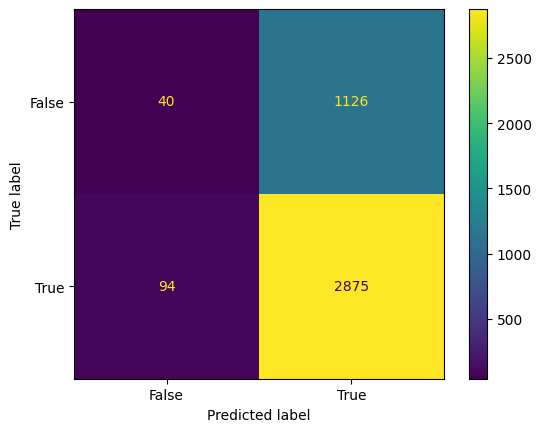

In [90]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('Random_forest', RandomForestClassifier(n_estimators = 150))], verbose = True)

# fitting the data in the pipe
pipe1.fit(data_pca, y_train)

prob_score=pipe1.predict_proba(test_pca)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(test_pca)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(test_pca)))
print(classification_report(y_test, pipe1.predict(test_pca),target_names=["class0","class1"]))
rf_score=prob_score
# print(rf_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(test_pca))
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Possible Conclusion for Decision Tree, 5 Fold Validated Decision Tree and Random Forest:
1. After performing 5-fold cross validation on a decision tree model, both utterance and speaker level accuracy
   slightly improved. However, the F1 score in both the decision tree models remain same.
2. Speaker level accuracy is better in case of decision tree after 5-fold cross validation compared to speaker level accuracy in case of Random Forest. However, utterance level accuracy is better in case of Random forest.
3. The F1 score in case of all the three models remain the same.

# Support Vector Machine

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics


In [92]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear',probability=True)

# Fit the model
svc.fit(data_pca, y_train)

SVC(kernel='linear', probability=True, random_state=1)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=  57.2s
Utterance level accuracy:  0.7180169286577993
0.8358671171171171


C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      class0       0.00      0.00      0.00      1166
      class1       0.72      1.00      0.84      2969

    accuracy                           0.72      4135
   macro avg       0.36      0.50      0.42      4135
weighted avg       0.52      0.72      0.60      4135

Balanced Accuracy: 0.5


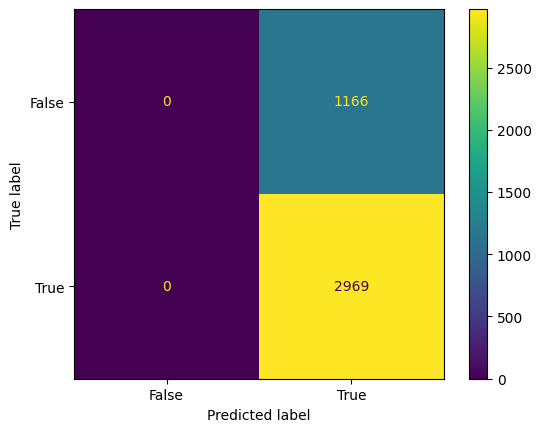

In [93]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('SVC', SVC(C=1.0, random_state=1, kernel='linear', probability=True))], verbose = True)

# fitting the data in the pipe
pipe1.fit(data_pca, y_train)

prob_score=pipe1.predict_proba(data_pca)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(test_pca)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(test_pca)))
print(classification_report(y_test, pipe1.predict(test_pca),target_names=["class0","class1"]))
svc_score=prob_score
# print(svc_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(test_pca))
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Logistic Regression

In [94]:
from sklearn import linear_model

In [95]:
logr = linear_model.LogisticRegression(max_iter=10000)
logr.fit(data_pca,y_train)

LogisticRegression(max_iter=10000)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
Utterance level accuracy:  0.6785973397823458
0.7978092195344592
              precision    recall  f1-score   support

      class0       0.35      0.16      0.22      1166
      class1       0.73      0.88      0.80      2969

    accuracy                           0.68      4135
   macro avg       0.54      0.52      0.51      4135
weighted avg       0.62      0.68      0.63      4135

Balanced Accuracy: 0.5204650456085093


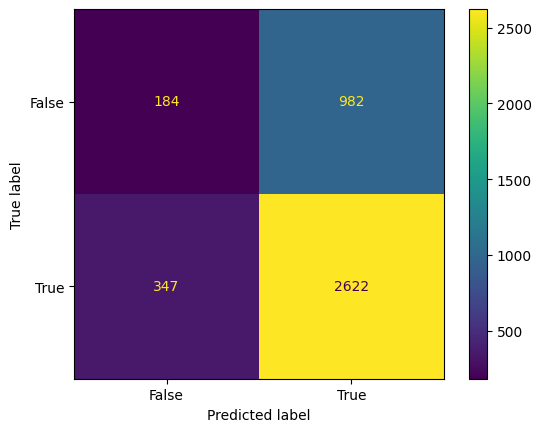

In [96]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('LR', linear_model.LogisticRegression())], verbose = True)

# fitting the data in the pipe
pipe1.fit(data_pca, y_train)

prob_score=pipe1.predict_proba(test_pca)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(test_pca)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(test_pca)))
print(classification_report(y_test, pipe1.predict(test_pca),target_names=["class0","class1"]))
lr_score=prob_score
# print(lr_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(test_pca))
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Expectation Maximization

In [97]:
from sklearn.mixture import GaussianMixture

In [98]:
gmm=GaussianMixture(n_components=2,random_state=0)

In [99]:
gmm.fit(X_train_new2)
# Predict the labels for the data points
predicted_labels = gmm.predict(X_test_new2)
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Utterance level accuracy:  0.3717049576783555
0.31124072110286327
              precision    recall  f1-score   support

      class0       0.29      0.81      0.42      1166
      class1       0.73      0.20      0.31      2969

    accuracy                           0.37      4135
   macro avg       0.51      0.51      0.37      4135
weighted avg       0.61      0.37      0.34      4135

Balanced Accuracy: 0.5062304765018976


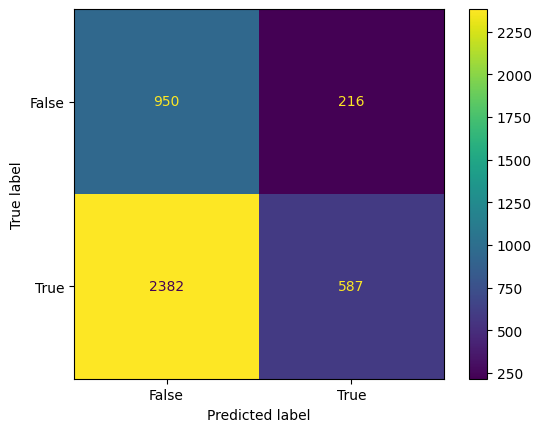

In [100]:
print("Utterance level accuracy: ", accuracy_score(y_test, predicted_labels))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, predicted_labels))
print(classification_report(y_test, predicted_labels,target_names=["class0","class1"]))
lr_score=prob_score
# print(lr_score)
confusion_matrix = metrics.confusion_matrix(y_test, predicted_labels)
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Final Conclusion:


1. The five models used in classification of Depressed and Non-Depressed speech provide the following Accuracy:

## Utterance Level Accuracy

a. Decision Tree : 0.5949214026602176,
b. Decision Tree (CV) : 0.626118500604595,
c. Random Forest : 0.6740024183796857,
d. SVM           : 0.7180169286577993,
e. Logistic Regg : 0.7139056831922612

Hence, We can say that SVM is giving the best result.

## Speaker Level Accuracy

a. Decision Tree : 0.7021276595744681, b. Decision Tree (CV) : 0.7659574468085106, c. Random Forest : 0.7021276595744681, d. SVM : 0.7021276595744681, e. Logistic Regg : 0.7446808510638298

Hence , Decision Tree(CV) is performing best at speaker level.

## F1 Score

a. Decision Tree : 0.7943240768996034, b. Decision Tree (CV) : 0.793355684242609, c. Random Forest: 0.7921820125209956, d. SVM : 0.8358671171171171, e. Logistic Regg : 0.8282270945259185

Hence, SVM is  giving the best F1 score.